In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/LumiNet/EDA/ # 평가할 데이터가 있는 디렉토리 / off와 output 페어가 필요

#폴더구조 EDA
            # ㄴlamp
                # ㄴ1
                    # ㄴoff.jpg, output_red.jpg, output_green.jpg, output_blue.jpg ...
                # ㄴ2
                    # ㄴoff.jpg, output_red.jpg, output_green.jpg, output_blue.jpg ...
            # ㄴpendant
                # ㄴ1
                    # ㄴoff.jpg, output_red.jpg, output_green.jpg, output_blue.jpg ...
                # ㄴ2
                    # ㄴoff.jpg, output_red.jpg, output_green.jpg, output_blue.jpg ...
            # ㄴstand
                # ㄴ1
                    # ㄴoff.jpg, output_red.jpg, output_green.jpg, output_blue.jpg ...
                # ㄴ2
                    # ㄴoff.jpg, output_red.jpg, output_green.jpg, output_blue.jpg ...

/content/drive/MyDrive/LumiNet_Files/LumiNet-choi/EDA


검색할 디렉토리 개수: 75개
[10_1] SSIM: 0.9041
[10_2] SSIM: 0.9043
[10_3] SSIM: 0.9228
[11_1] SSIM: 0.9259
[11_2] SSIM: 0.9191
[11_3] SSIM: 0.9365
[12_1] SSIM: 0.9022
[12_2] SSIM: 0.8822
[12_3] SSIM: 0.8819
[13_1] SSIM: 0.9457
[13_2] SSIM: 0.9467
[13_3] SSIM: 0.9362
[14_1] SSIM: 0.8479
[14_2] SSIM: 0.8343
[14_3] SSIM: 0.8293
[15_1] SSIM: 0.9036
[15_2] SSIM: 0.9050
[15_3] SSIM: 0.9035
[16_1] SSIM: 0.9332
[16_2] SSIM: 0.9388
[16_3] SSIM: 0.9417
[17_1] SSIM: 0.9188
[17_2] SSIM: 0.9137
[17_3] SSIM: 0.9265
[18_1] SSIM: 0.9211
[18_2] SSIM: 0.9361
[18_3] SSIM: 0.9241
[19_1] SSIM: 0.9535
[19_2] SSIM: 0.9537
[19_3] SSIM: 0.9559
[1_1] SSIM: 0.9449
[1_2] SSIM: 0.9530
[1_3] SSIM: 0.9536
[20_1] SSIM: 0.9015
[20_2] SSIM: 0.9071
[20_3] SSIM: 0.9101
[21_1] SSIM: 0.9649
[21_2] SSIM: 0.9617
[21_3] SSIM: 0.9598
[22_1] SSIM: 0.9432
[22_2] SSIM: 0.9334
[22_3] SSIM: 0.9256
[23_1] SSIM: 0.9385
[23_2] SSIM: 0.9385
[23_3] SSIM: 0.9303
[24_1] SSIM: 0.9158
[24_2] SSIM: 0.9212
[24_3] SSIM: 0.9083
[25_1] SSIM: 0.9019
[25_2]

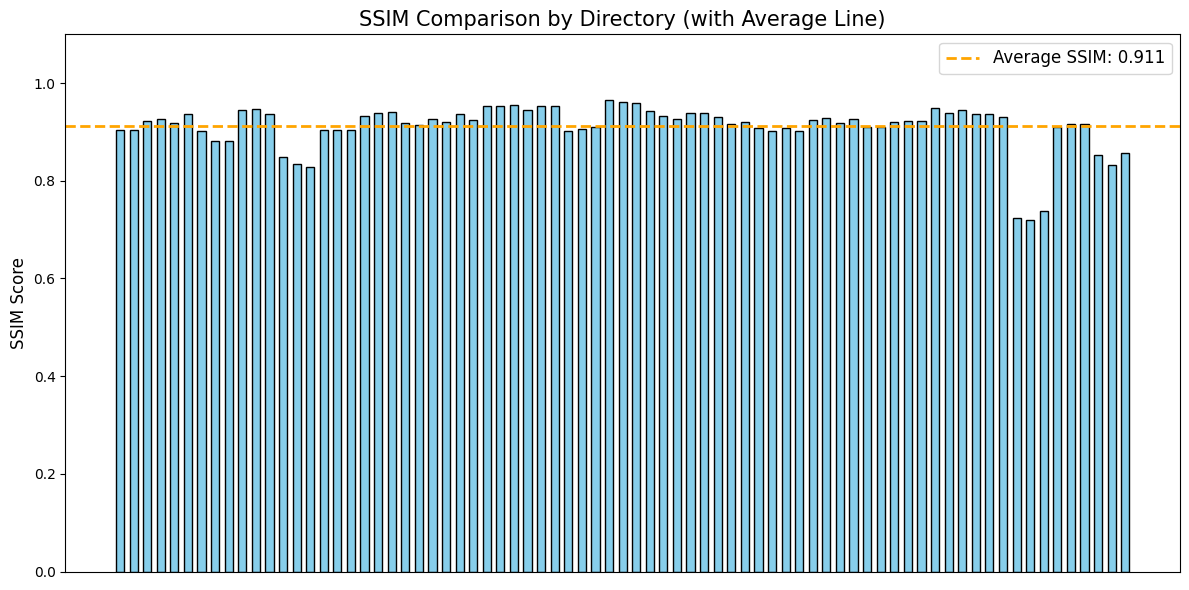

In [ ]:
'''
Experiment_SSIM.ipynb는 Lumiply가 추론한 결과물이 입력값인 'off'와 구조적으로 얼마나 유사한지 평가하는 노트북입니다.
본 노트북에서는 output과 off을 SSIM으로 평가하며 SSIM은 두 이미지가 변형되지않고 구조적으로 얼마나 유사한지 측정하는 지표입니다.
SSIM은 높을수록 유사하다고 평가하며 측정 후 그래프까지 한번에 출력하여 수치를 한눈에 확인할 수 있습니다.
'''


import os
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import numpy as np

def calculate_ssim_for_dirs(base_path="."):
    results = {}

    # 현재 경로의 모든 하위 디렉토리 가져오기
    subdirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    # 디렉토리 이름순으로 정렬
    subdirs.sort()

    print(f"검색할 디렉토리 개수: {len(subdirs)}개")

    for dirname in subdirs:
        dir_path = os.path.join(base_path, dirname)

        # 해당 디렉토리 내 파일 검색
        files = os.listdir(dir_path)
        path_off = None
        path_white = None

        for file in files:
            # 이미지 파일인지 확인
            if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                continue

            # 파일명 조건 확인
            if "off" in file:
                path_off = os.path.join(dir_path, file)
            elif "output_white" in file:  # 색 바꿀 때마다 여기만 바꾸면 됨 (output_red, output_green ... )
                path_white = os.path.join(dir_path, file)

        # 두 이미지가 모두 존재할 때만 계산
        if path_off and path_white:
            try:
                # 이미지 로드
                img_off = cv2.imread(path_off)
                img_white = cv2.imread(path_white)

                # 그레이스케일 변환 / SSIM은 그레이 스케일에서 측정
                gray_off = cv2.cvtColor(img_off, cv2.COLOR_BGR2GRAY)
                gray_white = cv2.cvtColor(img_white, cv2.COLOR_BGR2GRAY)

                # 크기 맞추기 (output를 off 크기에 맞춤)
                if gray_off.shape != gray_white.shape:
                    gray_white = cv2.resize(gray_white, (gray_off.shape[1], gray_off.shape[0]))

                # SSIM 계산 off vs output
                score, _ = ssim(gray_off, gray_white, full=True)
                results[dirname] = score
                print(f"[{dirname}] SSIM: {score:.4f}")

            except Exception as e:
                print(f"[{dirname}] 에러 발생: {e}")
        else:
            print(f"[{dirname}] 건너뜀 (이미지 쌍을 찾지 못함)")

    return results

# 1. 계산 실행
ssim_data = calculate_ssim_for_dirs()

# 2. 그래프 그리기
if ssim_data:
    names = list(ssim_data.keys())
    scores = list(ssim_data.values())
    avg_score = sum(scores) / len(scores)  # 평균 계산

    plt.figure(figsize=(12, 6))

    # 막대 그래프 생성
    bars = plt.bar(names, scores, color='skyblue', edgecolor='black', width=0.6)
    plt.xticks([])
    plt.axhline(y=avg_score, color='orange', linestyle='--', linewidth=2, label=f'Average SSIM: {avg_score:.3f}')
    plt.ylabel('SSIM Score', fontsize=12)
    plt.title('SSIM Comparison by Directory (with Average Line)', fontsize=15)
    plt.ylim(0, 1.1)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("\n그래프를 그릴 데이터가 없습니다.")